# Lecture 6: Time discretisation

In [1]:
# Initialisation

%matplotlib inline

import matplotlib
import numpy as np
from matplotlib import animation, rc
import matplotlib.pyplot as plt
from sympy import *
from scipy.sparse import diags
from ipywidgets import *
from IPython.display import display, Markdown, HTML

x = Symbol('x')
rc('animation', html='jshtml')

## Explicit time integration

We look at the example seen in the lecture notes:

Consider the diffusion equation $u_t = \alpha u_{xx}$ with the initial condition $u(x,0)=sin(\pi x)$ for $u \in [0,1]$ and boundary conditions $u(0,t)=u(1,t)=0$. The explicit time integration scheme is:

$$
u_i^{n+1} = u_i^n + \frac{\alpha \Delta t}{\Delta x^2} (u_{i+1}^n-2u_i^n+u_{i-1}^n)
$$

We now plot out the example:

$$\sigma = \frac{\alpha \Delta t}{\Delta x^2} = 0.40$$

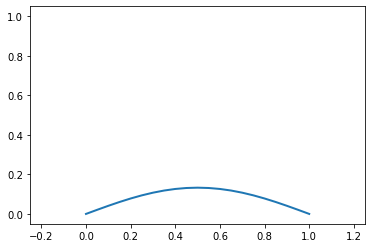

In [2]:
# Variables
f = sin(np.pi*x)
frames = 100
N = 21
alpha = 0.0001
ts = 2 # number of steps before plotting

# Initialise
dt = 10
dx = 1.0/(N-1)
xl = np.linspace(0.0,1.0,N).tolist()
u0 = np.array([f.subs(x,z) for z in xl])
uc = [i for i in u0]
coeff = alpha * dt / (dx**2)

display(Markdown('$$\\sigma = \\frac{\\alpha \\Delta t}{\\Delta x^2} = %.2f' % coeff + '$$'))
fig = plt.figure()
ax = plt.axes(xlim=(-.25,1.25))
line, = ax.plot(xl,uc,lw=2)

def update(i, ts):
    global uc, xl, coeff, line
    for j in range(ts): # remember to enforce BC
        uc = np.array([0] + [uc[i] + coeff * (uc[i-1]-2*uc[i]+uc[i+1]) for i in range(1,N-1)] + [0])
    p = line.set_data(xl,uc)
    return line,

anim = animation.FuncAnimation(fig, update, fargs=(ts,), frames=frames, interval=20, blit=True)
anim

In the above example, the numerical solution is stable ($\sigma = 0.4 < 0.5$).

We can examine the numerical solution when it is unstable by changing $\sigma$ as such:

In [3]:
alpha = 0.0002
coeff = alpha * dt / (dx**2)
uc = [i for i in u0] # reset uc
display(Markdown('$$\\sigma = \\frac{\\alpha \\Delta t}{\\Delta x^2} = %.2f' % coeff + '$$'))
anim2 = animation.FuncAnimation(fig, update, fargs=(ts,), frames=frames, interval=20, blit=True)
anim2

$$\sigma = \frac{\alpha \Delta t}{\Delta x^2} = 0.80$$

## Linear advection

For linear advection equation

$$
u_t + a u_x = 0
$$

Using initial conditions

$$
f(x) = 
\begin{cases}
0 & x \leq -0.2 \\
1+\frac{x}{2} & -0.2 \leq x \leq 0 \\
1-\frac{x}{2} & 0 \leq x \leq 0.2 \\
0 & x \geq 0.2 \\
\end{cases}
$$

we can examine each finite difference scheme.

Backward difference, $\lambda = \frac{\alpha \Delta t}{\Delta x} = 0.50$

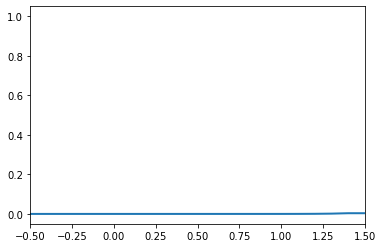

In [4]:
# Variables
f = Piecewise((0, x<=-0.2), (1+x/2, x<=0), (1-x/2,x<=0.2), (0, True))
frames = 50
N = 21
alpha = 0.005
ts = 1 # number of steps before plotting

# Initialise
dt = 10
dx = 2.0/(N-1)
xl = np.linspace(-0.5,1.5,N).tolist()
u0 = np.array([f.subs(x,z) for z in xl])
uc = [i for i in u0]
coeff = alpha * dt / dx

display(Markdown('Backward difference, $\\lambda = \\frac{\\alpha \\Delta t}{\\Delta x} = %.2f' % coeff + '$'))
fig = plt.figure()
ax = plt.axes(xlim=(-.5,1.5))
line, = ax.plot(xl,uc,lw=2)

def bd(u):
    global coeff
    return lambda i: u[i] + (coeff) * (u[i-1]-u[i])

def update2(i, ts, d):
    global uc, xl, line
    for j in range(ts):
        uc = np.array( [d(uc)(1)] + [d(uc)(z) for z in list(range(1,N-1))] + [d(uc)(N-2)])
    p = line.set_data(xl,uc)
    return line,

anim3 = animation.FuncAnimation(fig, update2, fargs=(ts,bd,), frames=frames, interval=50, blit=True)
anim3

We can also examine other finite difference schemes with different Courant numbers.

Forward difference, $\lambda = \frac{\alpha \Delta t}{\Delta x} = 0.50$

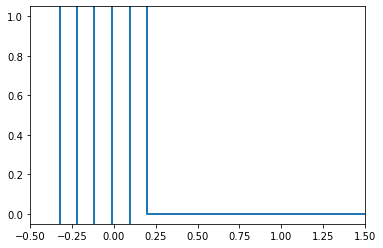

In [5]:
def fd(u):
    global coeff
    return lambda i: u[i] + (coeff) * (-u[i+1]+u[i])

display(Markdown('Forward difference, $\\lambda = \\frac{\\alpha \\Delta t}{\\Delta x} = %.2f' % coeff + '$'))
fig = plt.figure()
ax = plt.axes(xlim=(-.5,1.5))
uc = [i for i in u0]
line, = ax.plot(xl,uc,lw=2)

anim4 = animation.FuncAnimation(fig, update2, fargs=(ts,fd,), frames=frames, interval=50, blit=True)
anim4